#📌 Extracción

In [302]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = pd.read_json(url)
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [304]:
customer = pd.json_normalize(data['customer'])
phone = pd.json_normalize(data['phone'])
internet = pd.json_normalize(data['internet'])
account = pd.json_normalize(data['account'])

data_original = data.drop(columns=['customerID', 'customer', 'phone', 'internet', 'account'])

datafinal = pd.concat([data_original, customer, phone, internet, account], axis=1)

print(datafinal.shape)
datafinal.head()

(7267, 20)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [305]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [306]:
datafinal.dropna(inplace=True)
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [307]:
# Conteo de los niveles en las diferentes columnas categóricas para borrar las que tienen 1 subnivel
cols_cat = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for col in cols_cat:
  print(f'Columna {col}: {datafinal[col].unique()}')

Columna Churn: ['No' 'Yes' '']
Columna gender: ['Female' 'Male']
Columna Partner: ['Yes' 'No']
Columna Dependents: ['Yes' 'No']
Columna PhoneService: ['Yes' 'No']
Columna MultipleLines: ['No' 'Yes' 'No phone service']
Columna InternetService: ['DSL' 'Fiber optic' 'No']
Columna DeviceProtection: ['No' 'Yes' 'No internet service']
Columna TechSupport: ['Yes' 'No' 'No internet service']
Columna StreamingTV: ['Yes' 'No' 'No internet service']
Columna StreamingMovies: ['No' 'Yes' 'No internet service']
Columna Contract: ['One year' 'Month-to-month' 'Two year']
Columna PaperlessBilling: ['Yes' 'No']
Columna PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [308]:
#Buscamos los datos con espacios vacios
datos_vacios = datafinal['Churn'].astype(str).apply(lambda x: x == ' ' * len(x))

#Eliminar solo esas filas de datos vacios
datafinal = datafinal[~datos_vacios]
datafinal['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Al tener todos más de un subnivel, no se elimina ninguna columna sin embargo churn tiene 3 subniveles, por lo que se eliminó



In [309]:
#Al tener Charges.total como objeto, lo tranformamos a una variable númerica
datafinal['Charges.Total'] = pd.to_numeric(datafinal['Charges.Total'], errors='coerce')
datafinal.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Al tener todos una desviación estandar(std) diferente de 0 no se elimina ninguna columna y transformamos 'SeniorCitizen'  a una variable categorica

In [310]:
#cambiamos el seniorCitizen
diccionario = {0:'No', 1:'Yes'}
datafinal['SeniorCitizen'] = datafinal['SeniorCitizen'].map(diccionario)

In [311]:
#Colocamos una nueva columna al dataframe, Charges.daily
datafinal['Charges.Daily'] = datafinal['Charges.Monthly'] / 30
datafinal.describe()

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158723
std,24.559481,30.090047,2266.771362,1.003002
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.500000,401.450000,1.183333
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.850000,3794.737500,2.995000
max,72.000000,118.750000,8684.800000,3.958333


Al tener menos datos en charges.total, lo arreglamos


In [312]:
datafinal = datafinal.dropna(subset=['Charges.Total'])
datafinal.describe()

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


In [313]:
#Eliminamos repetidos
print(f'Tamaño del set antes de eliminar las filas repetidas: {datafinal.shape}')
datafinal.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {datafinal.shape}')

Tamaño del set antes de eliminar las filas repetidas: (7032, 21)
Tamaño del set después de eliminar las filas repetidas: (7010, 21)


#📊 Carga y análisis

Empezamos coin graficas de conteo

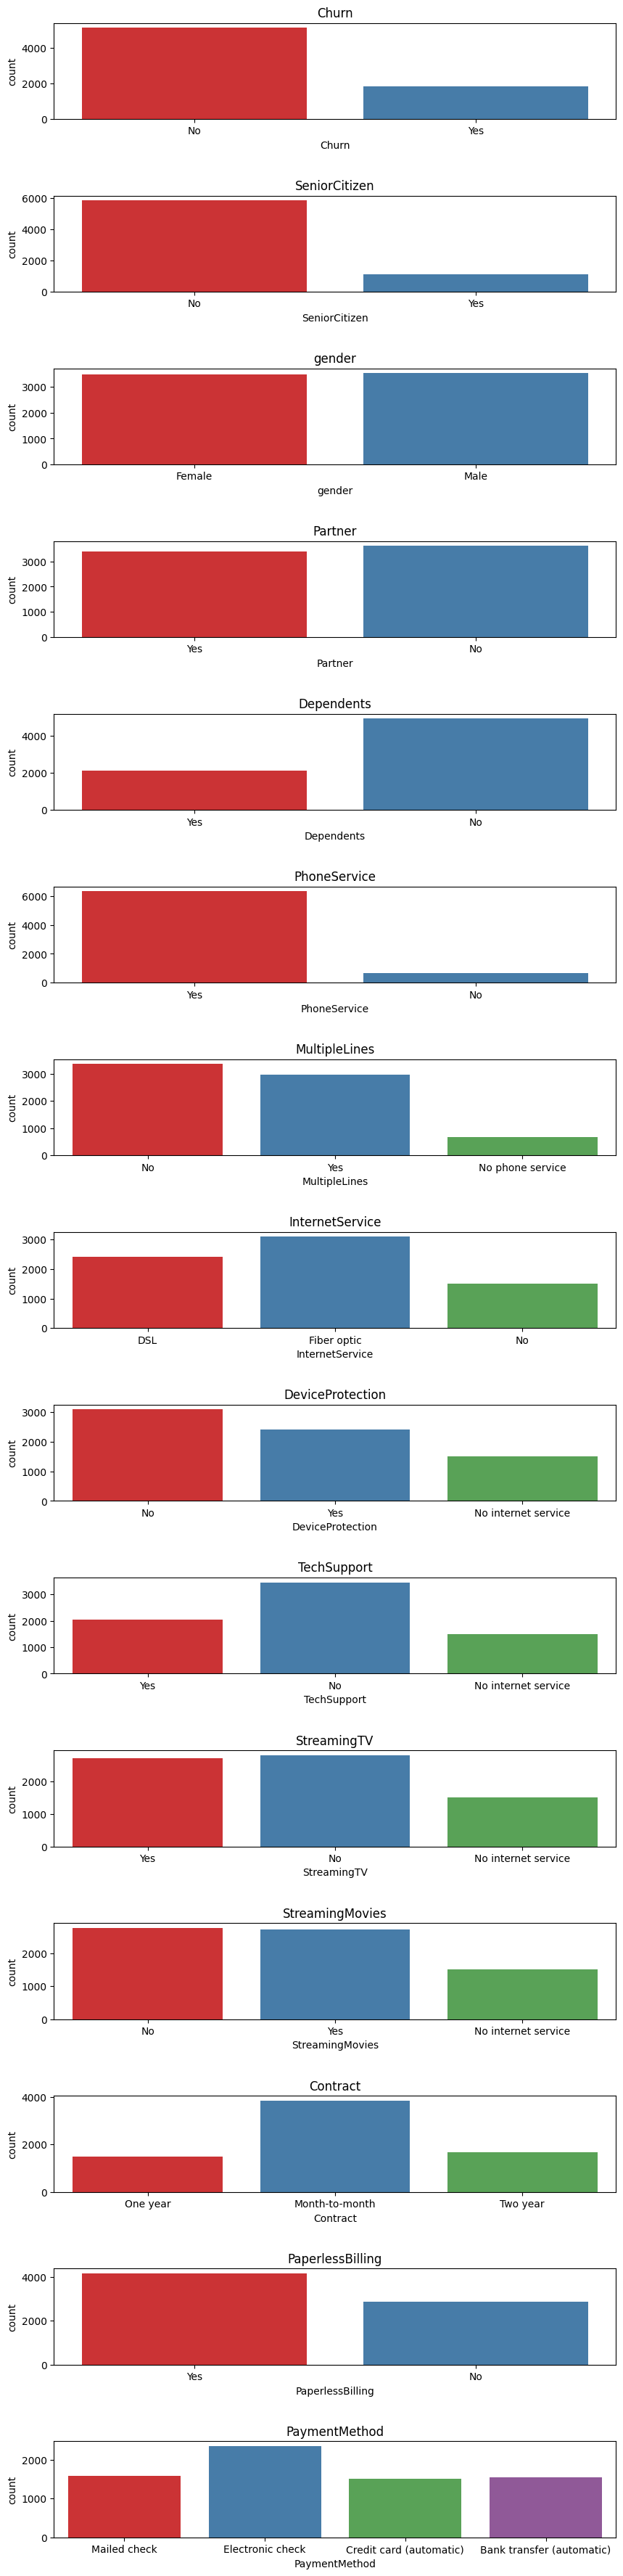

In [314]:
# Gráficos de barras de conteo
cols_cat = ['Churn', 'SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.8)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=datafinal, ax=ax[i], hue=col, palette='Set1')
  ax[i].set_title(col)


Transformamos churn a una variable numerica de 0 y 1


In [315]:
# Comencemos representando la variable a predecir de forma binaria:
# 'yes' = 1, 'no' = 0

diccionario = {'No':0, 'Yes':1}
datafinal['Churn'] = datafinal['Churn'].map(diccionario)

# De esta forma resulta fácil calcular la tasa de conversión: el promedio de la evasión


Comparamos Churn con las variables numericas


In [316]:
#Variables númericas
cols_num = ['Charges.Monthly', 'Charges.Total', 'Charges.Daily','tenure']

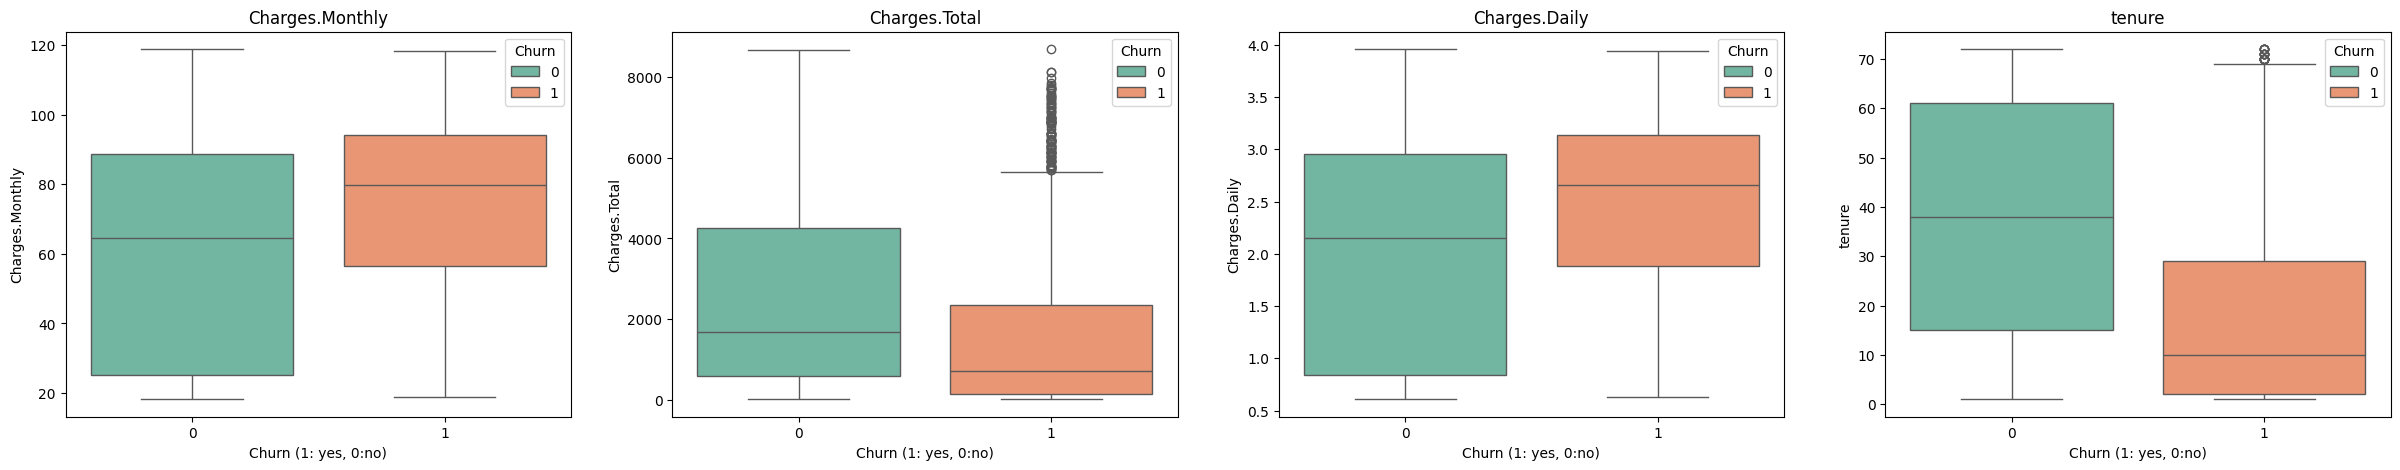

In [317]:
fig, ax = plt.subplots(nrows=1, ncols=len(cols_num), figsize=(30,5))
fig.subplots_adjust(hspace=.1)

for i, col in enumerate(cols_num):
  bplt = sns.boxplot(x="Churn", y=col, data=datafinal, ax=ax[i], hue ="Churn", palette = 'Set2')
  ax[i].set_xlabel('Churn (1: yes, 0:no)')
  ax[i].set_title(col)

El gasto mensual, diario y total, no nos dan información relevante

Los que presentan meses de contratos altos presentan más permanencia que los que presentan contratos cortos.

In [318]:
# Función para graficar tasas de conversión que es el porcentaje de los que desertaron

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = datafinal.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order, hue = var_predictora, palette='Set1')
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

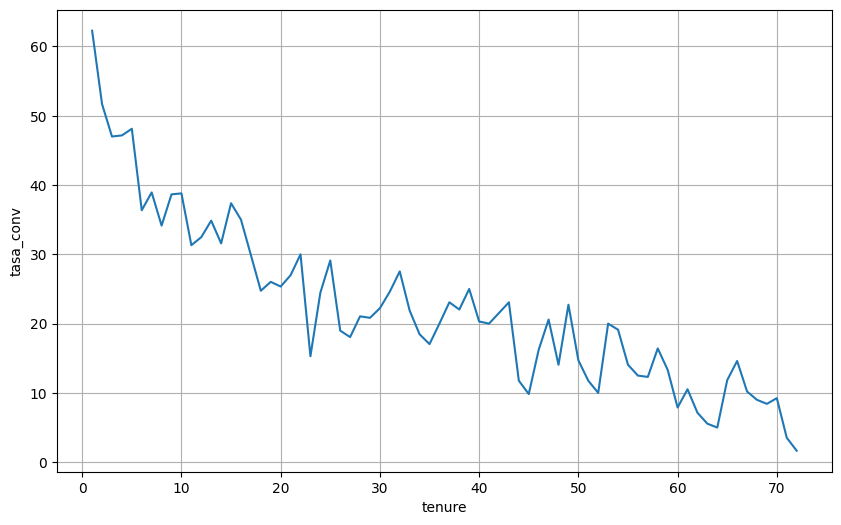

In [319]:
graficar_tasas_conversion('tenure', 'Churn', 'line')

Observación: Entre menos duración tenga los meses de contrato del cliente, es más probable que deje la empresa, más que todo en el rango de 0-15 meses


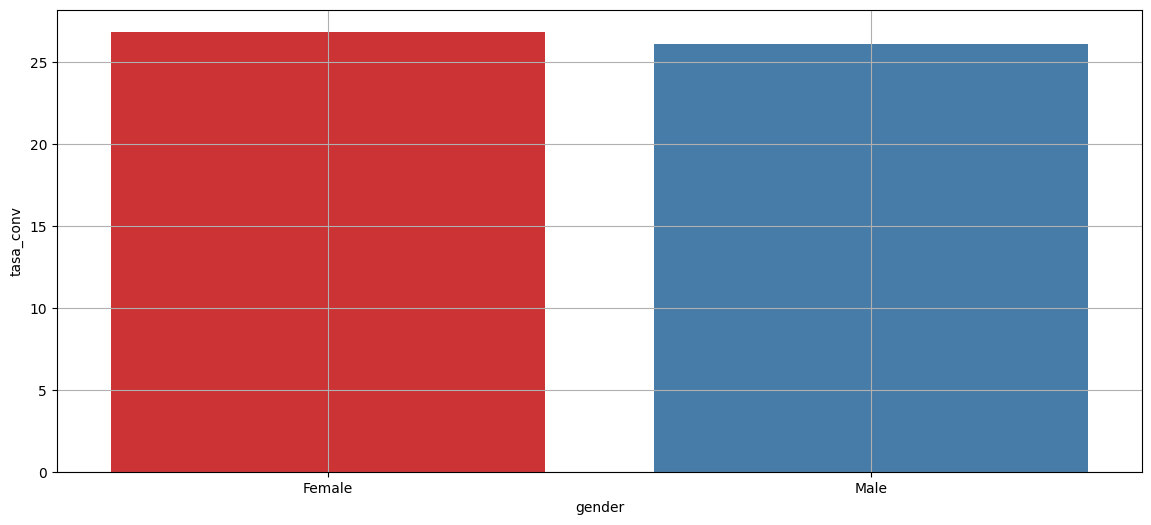

In [320]:
graficar_tasas_conversion('gender', 'Churn', 'bar')

Observación:


Las mujeres tienden a tener más evasión, sin embargo, no es una diferencia significativa entre ambos generos




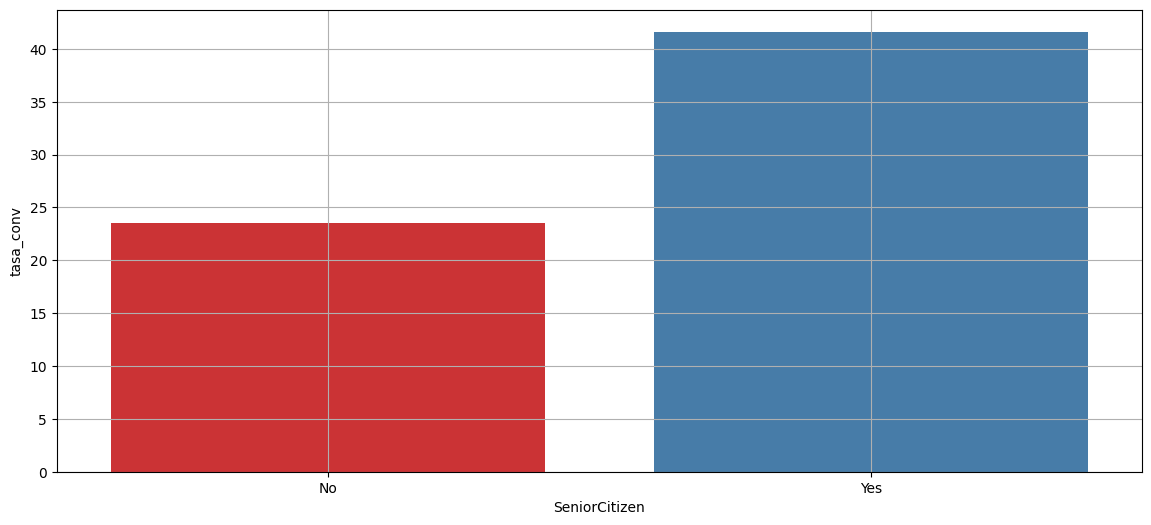

In [321]:
graficar_tasas_conversion('SeniorCitizen', 'Churn', 'bar')

Observación: Los que tienen edad igual o mayor a 65, tienen una tendencia a la evasión-cancelar con más de 40%



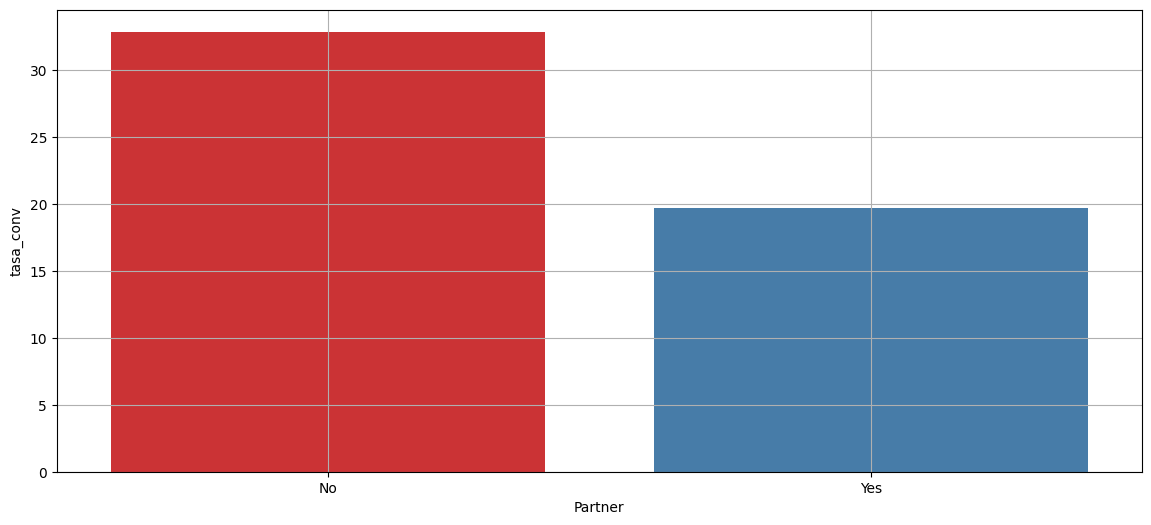

In [322]:
graficar_tasas_conversion('Partner', 'Churn', 'bar')

Observación: Los que no tienen pareja tienen mayor probabilidad de evasión.

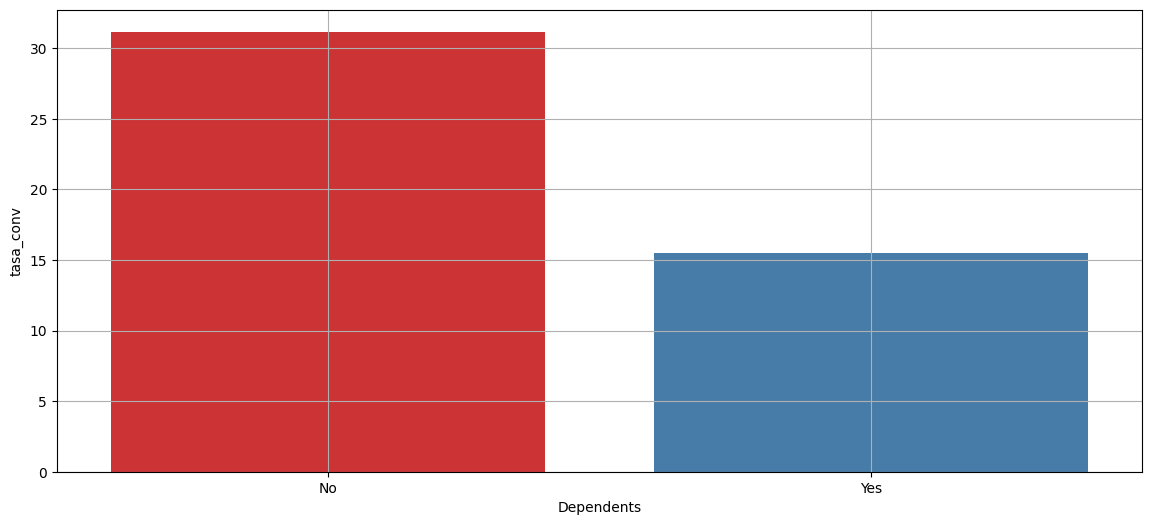

In [323]:
graficar_tasas_conversion('Dependents', 'Churn', 'bar')

Los que no tienen dependientes tienen mayor probabilidad de evasion que los que tienen, de casi el doble (33%)

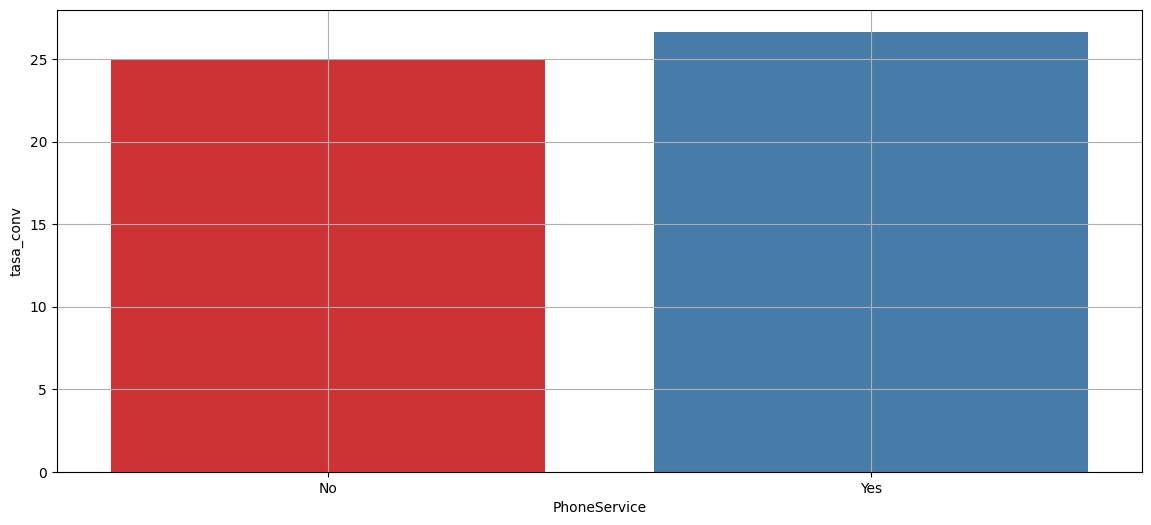

In [324]:
graficar_tasas_conversion('PhoneService', 'Churn', 'bar')

No hay una diferencia significativa entre los que cuentan con servicio de telefonia


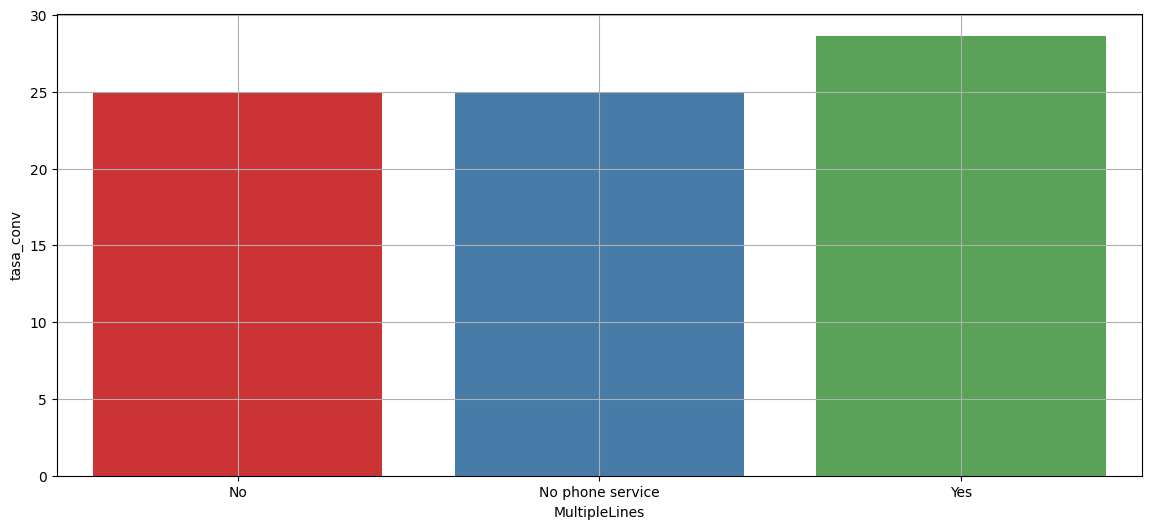

In [325]:
graficar_tasas_conversion('MultipleLines', 'Churn', 'bar')

No se encuentra diferencia notoria entre los datos si se presenta multiples lineas telefonicas o no tiene.

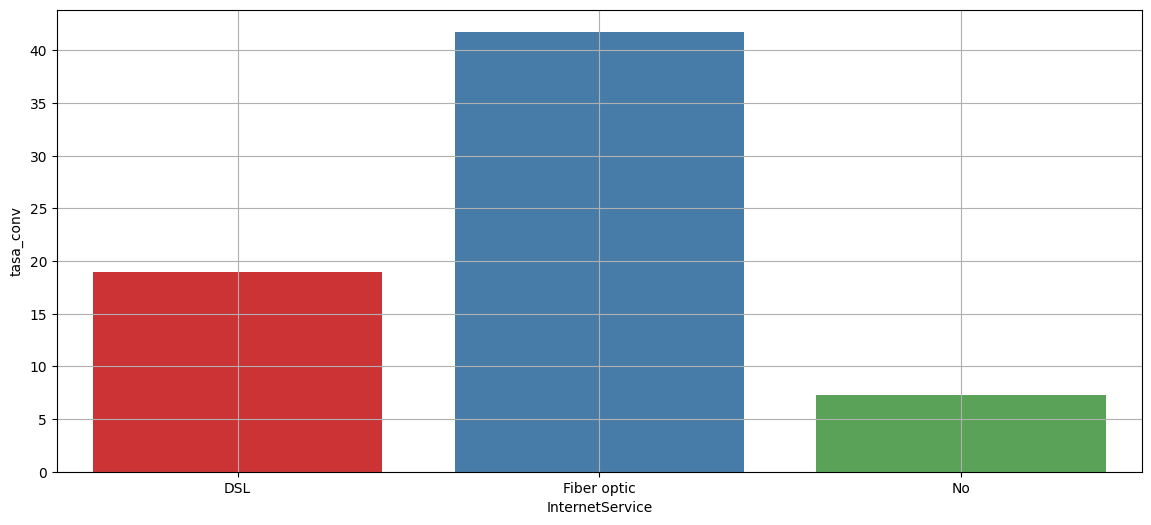

In [326]:
graficar_tasas_conversion('InternetService', 'Churn', 'bar')

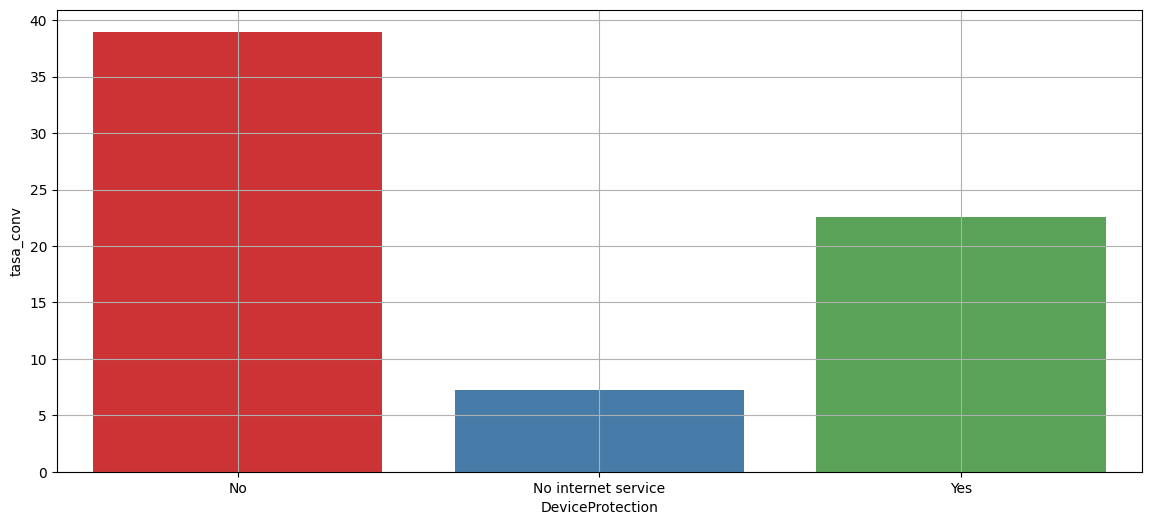

In [327]:
graficar_tasas_conversion('DeviceProtection', 'Churn', 'bar')

Observación: Los que no presentan protección de protección, presentan una evasión de casi del 40%, significativo que a los que tienen y los que no presentan servicio de internet.

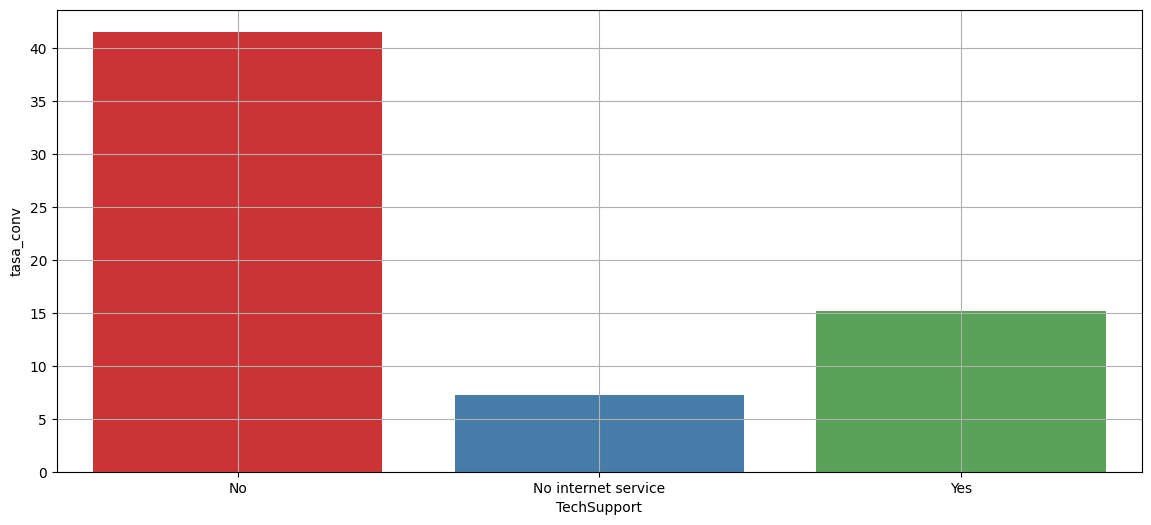

In [328]:
graficar_tasas_conversion('TechSupport', 'Churn', 'bar')

Observación: Los que no presentan techsupport, presentan una evasión de más del 40%, significativo que a los que tienen y los que no presentan servicio de internet.

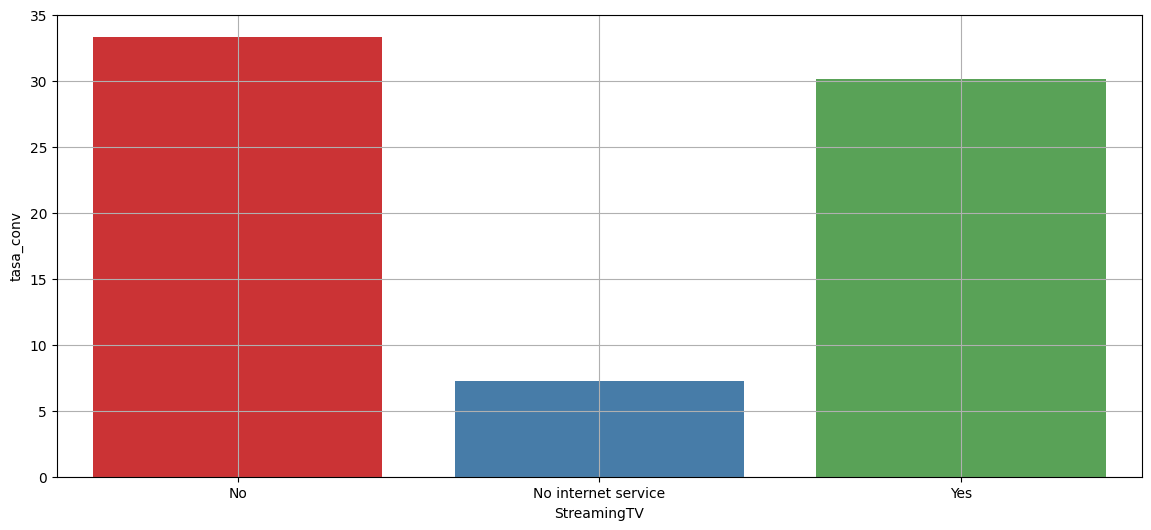

In [329]:
graficar_tasas_conversion('StreamingTV', 'Churn', 'bar')

Observación:
No ha diferencia entre los que tienen servicio de streaming TV y los que si tienen en el momento de la evasión

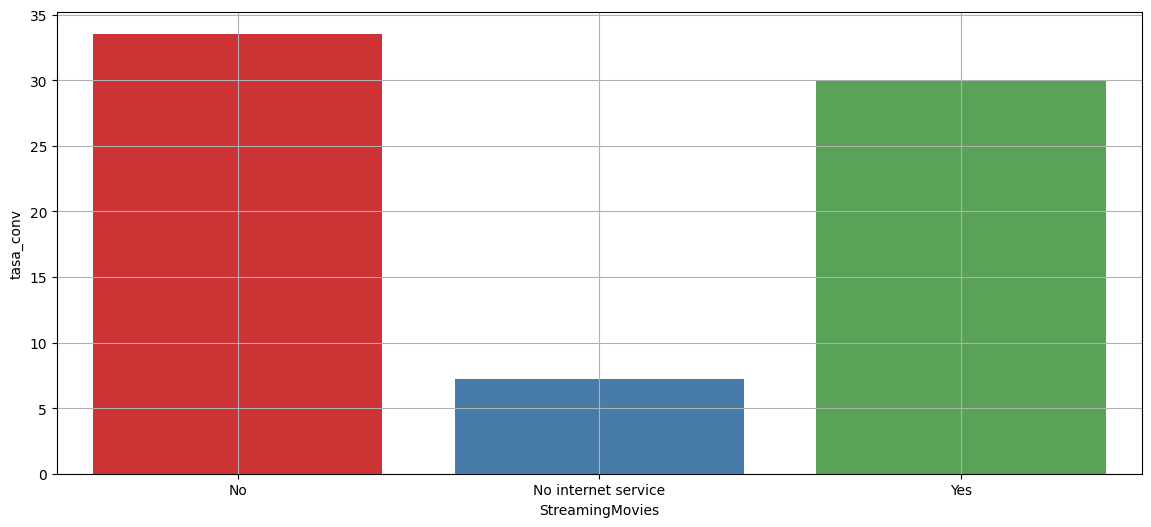

In [330]:
graficar_tasas_conversion('StreamingMovies', 'Churn', 'bar')

Observación:
No ha diferencia entre los que tienen servicio de streaming Movies y los que si tienen en el momento de la evasión

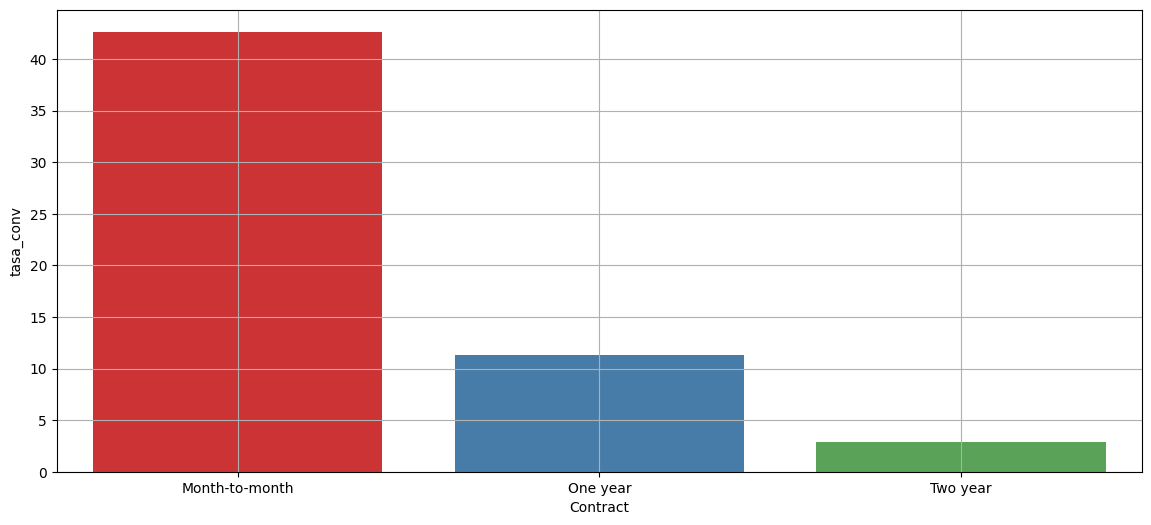

In [331]:
graficar_tasas_conversion('Contract', 'Churn', 'bar')

Observación:
Los que tienen contrato mes a mes tienen una evasión alcanzado el 45%

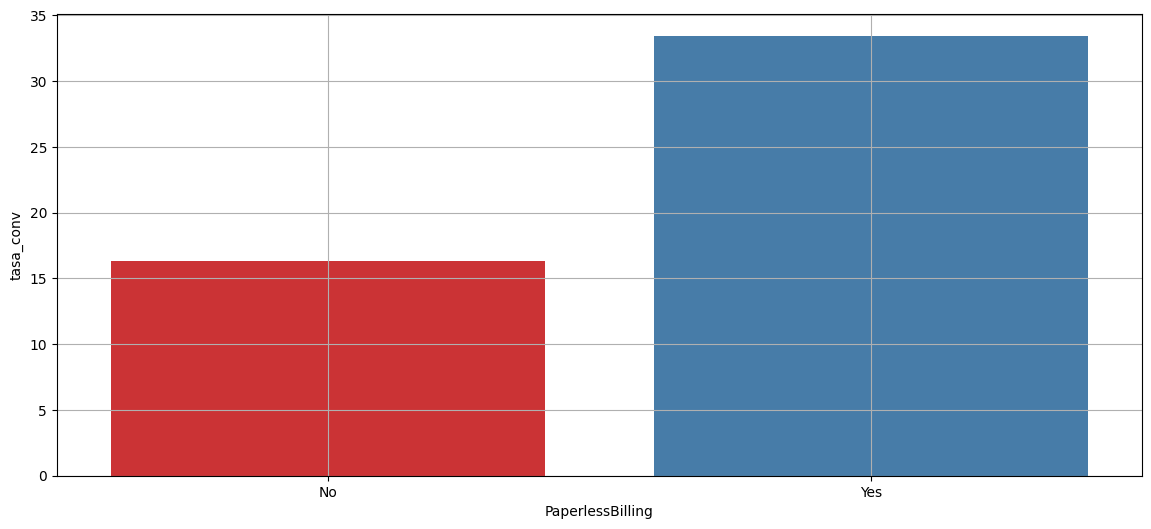

In [332]:
graficar_tasas_conversion('PaperlessBilling', 'Churn', 'bar')

Observación:
Los que píden factura en linea, son mas propensos a irse que los que no

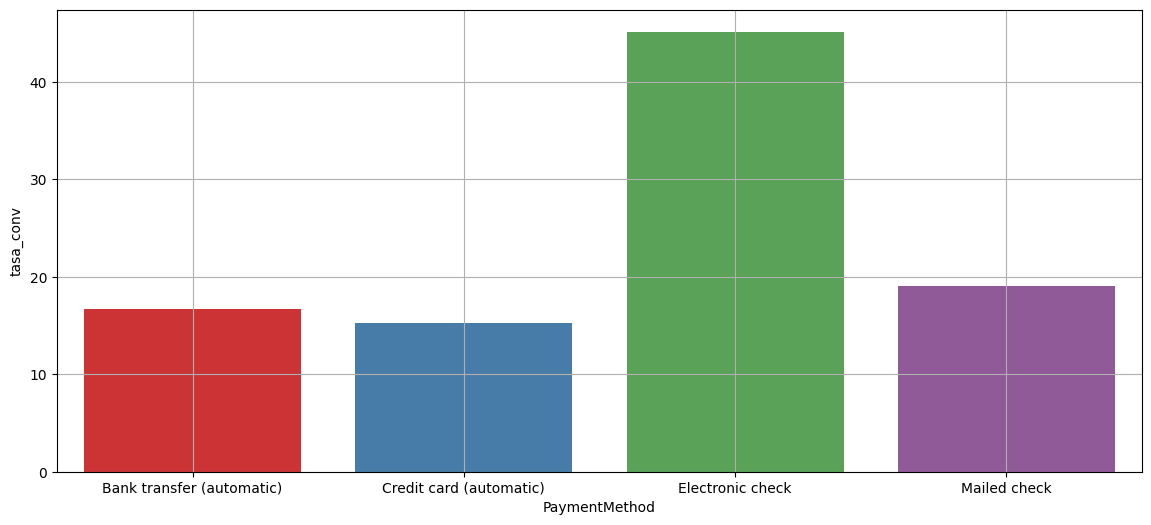

In [333]:
graficar_tasas_conversion('PaymentMethod', 'Churn', 'bar')

Observación:
Electronic check posee un alto porcentaje de evasión, superando 45%

#📄Informe final

**Introducción:**

 Para comprender los factores de la alta tasa de cancelación(evasión) en telecomx, se recopilará los datos de los clientes que prestan o prestaron servicio con la empresa, con el fin de realizar un análisis exploratorio de estos.

 **Limpieza y tratamiento de datos:**

 Se tiene los datos con un formato json, por lo cual al extraer, se normalizan los datos para convertilos en un dataframe y de esta manera facilitar el proceso. En esto vemos como son los datos, si son categoricas(y sus subniveles) o numericas, y se descarta una columna que no es relevante como el costumerid. En este eliminamos los duplicados y los que son nulos, dado a que pueden intervenir en el análisis, además, se eliminaron datos que estaban rellenados con un espacio vacio (''). Finalmente se transformó la variable númerica SeniorCitizen a una categorica para mejor entendimiento y el Churn a una variable númerica para facilitar así la relación que tiene con el resto de variables en los datos.

 **Análisis exploratorio:**

 Primeramente, análizamos los datos de forma individual de las variables categoricas, como los ejemplos gráficos que se encuentran a continuación:

 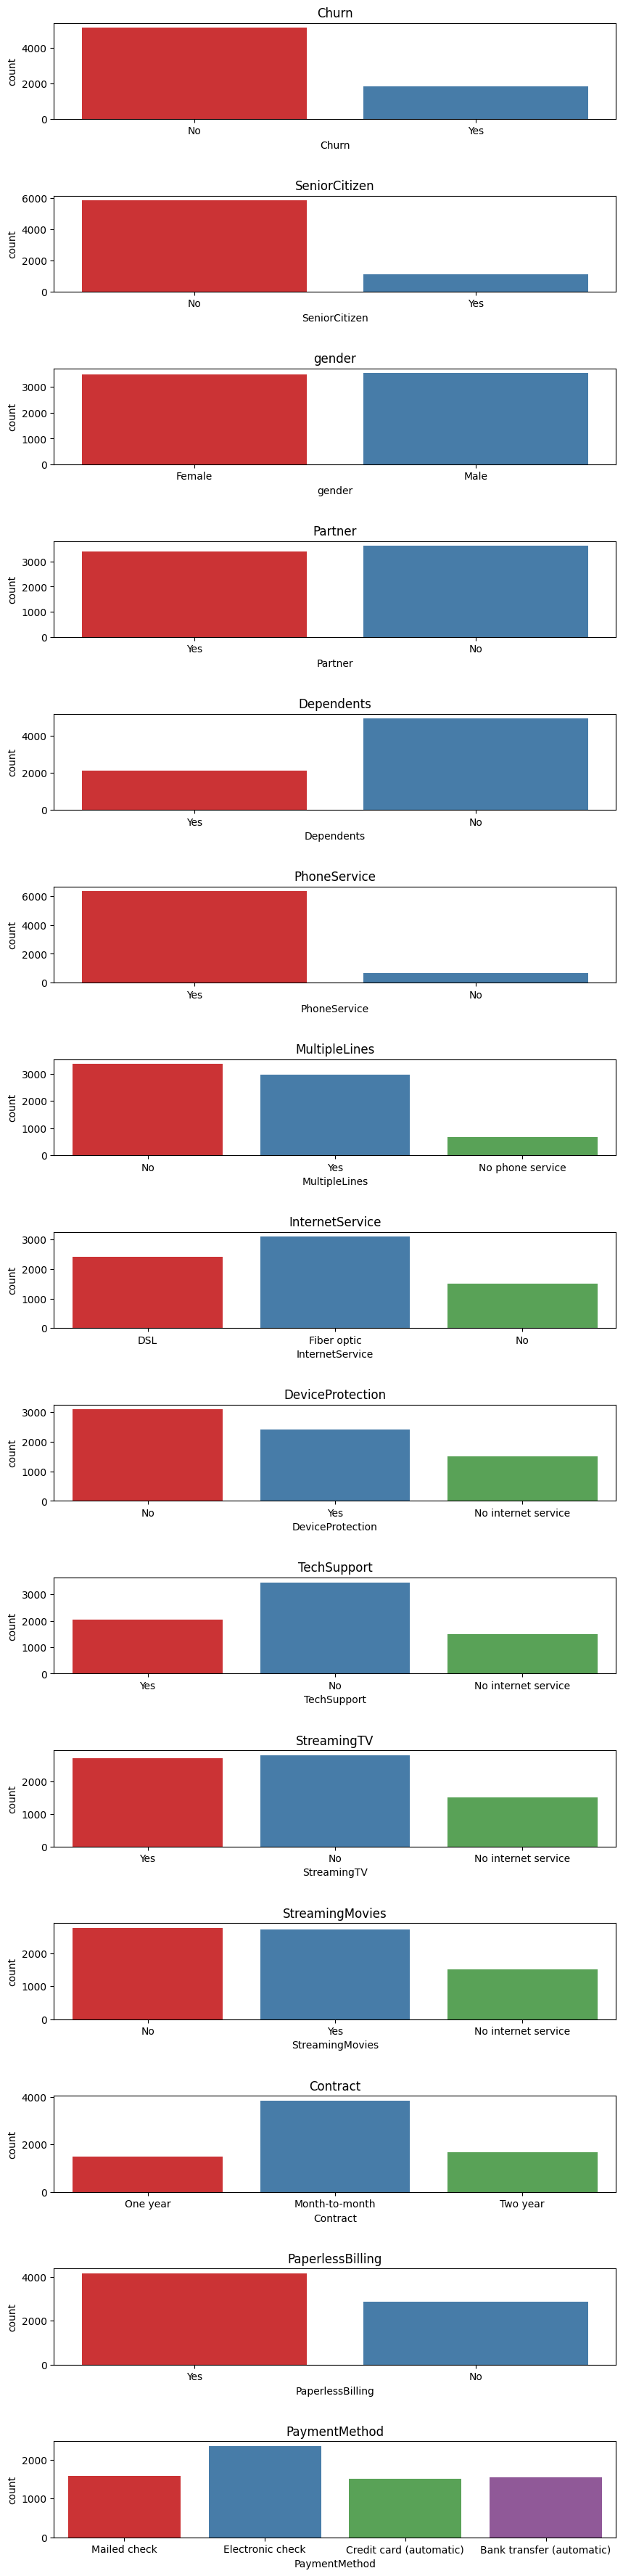

 En este se muestran como se comportan los datos.

 De esta manera, comparamos como se comportan las variables númericas con la variable 'Churn' que hace referencia a las cancelaciones del servicio(evasión), teniendo gráficas como las siguientes:
 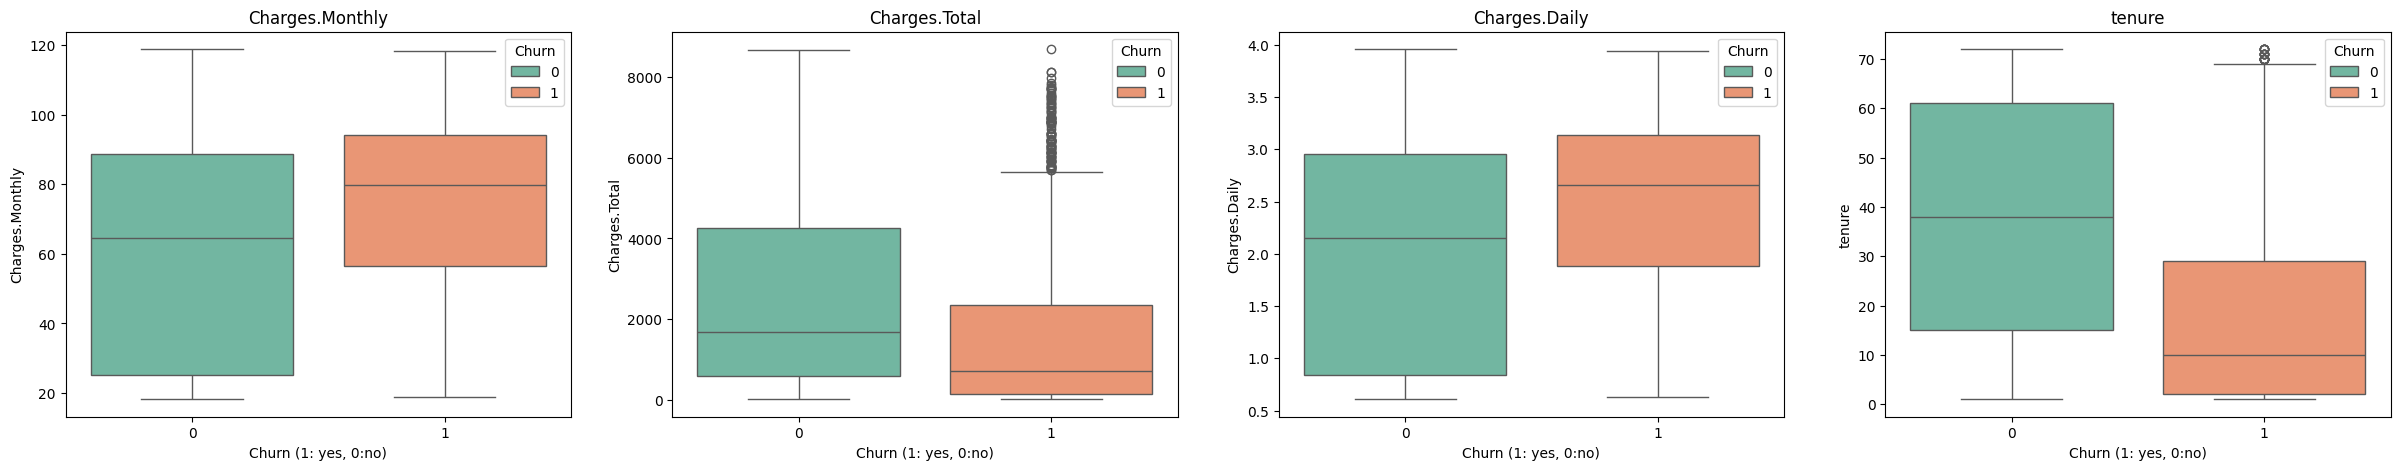

 En este, encontramos que la variable 'ternure', tiene una relación con el factor de la cancelación, por la cual se tomará en cuenta para un siguiente análisis.

 Sabiendo esto, se busca por medio de la tasa de conversión de 'Churn', el porcentaje de personas que tienen evasión en base a 'ternure', que es la duración del contrato del cliente, por lo que por un grafica de lineas, se tiene el siguiente resultado:
 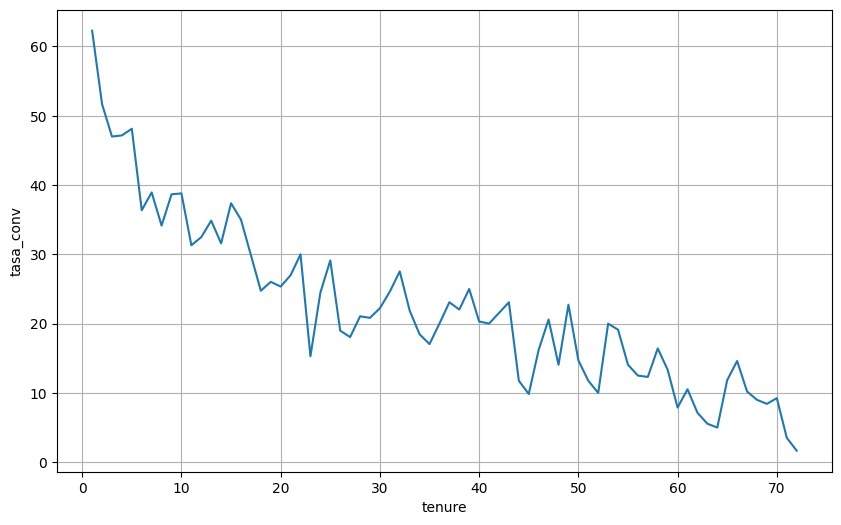

Este, nos da una buena información, donde nos da a entender que las personas con una duración corta, tienden a tener cancelaciones del servicio, con un rango significativo entre los 0-15 meses, dado a que presentan tasas de evasión de 35% o mayor.

De la misma manera, por medio de graficos de barras, relacionamos haciendo uso de la tasa de conversión de 'Churn' con el resto de variables categoricas, por ejemplo con 'Multiplelines', teniendo el resultado a continuación:

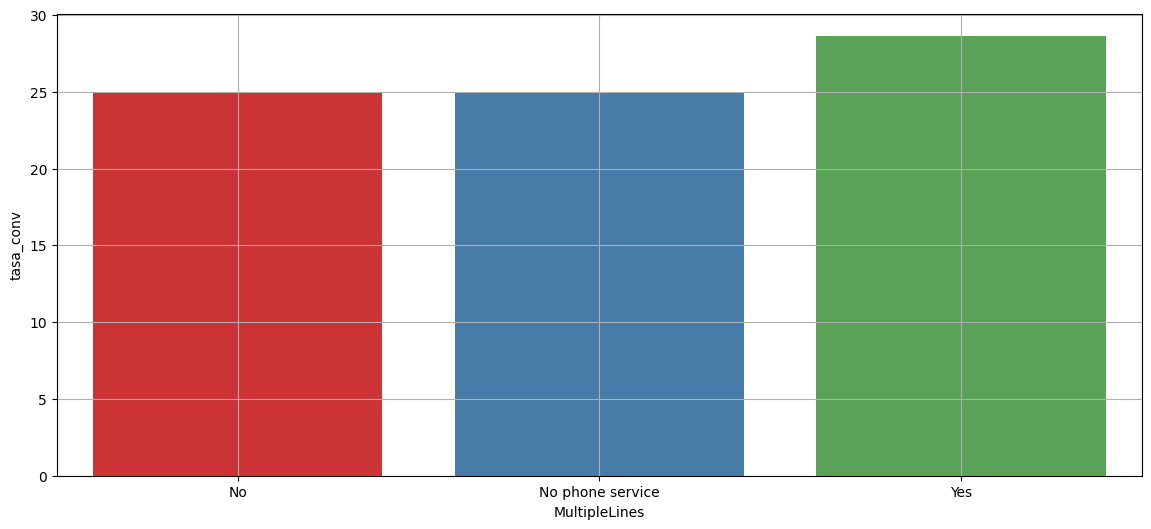

Este grafico nos brinda la información sobre si el factor de que si el cliente posee multiples lineas telefonicas o no es una causa por el cual el cliente realiza una evasión o cancelación, observando de esta manera que estos valores no tienen una diferencia significativa entre ellos, por cual no es un causal.

Tomando en cuenta este análisis, se van a análizar los gráficos donde si se puede observar una relación entre la evasión el factor a análizar.

Empezando por SeniorCitizen, haciendo una gráfica como la expuesta anteriormente, tenemos este resultado:

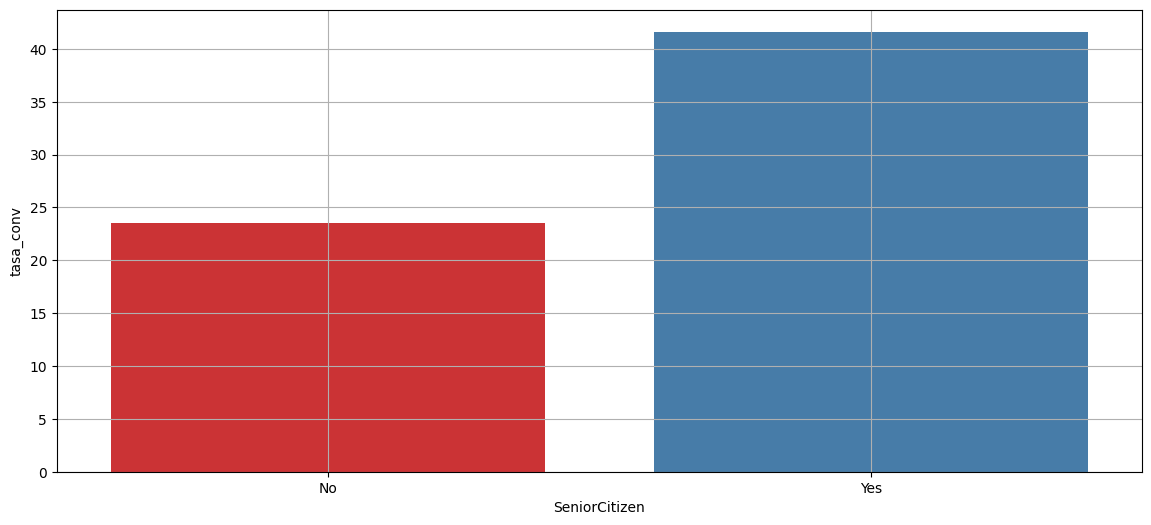

Este nos da a entender que las personas que tienen una edad mayor o igual a 65 años, presentan evación en el servicio, por lo que es un factor a tener en cuenta.

Teniendo de la variable categorica 'Partner', Se obtuvo el siguiente gráfico:

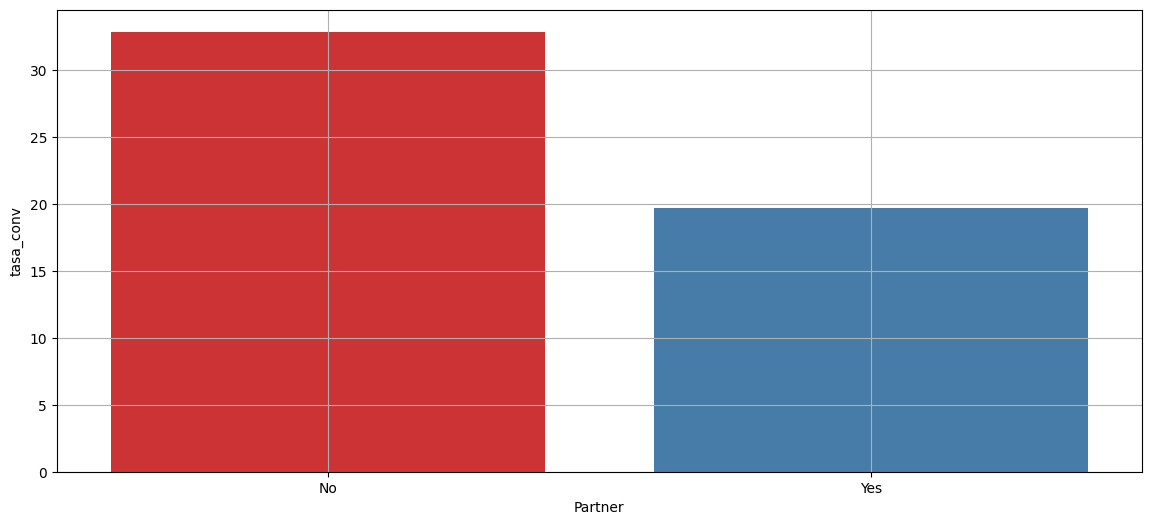

El cual nos enseña que los que no tienen pareja, tienen un mayor porcentaje de evasión con una diferencia de alrededor del 15% con los que tiene, por lo que puede ser un factor a influir.

Si análizamos la variable categorica 'Dependents', tenemos el siguiente resultado:

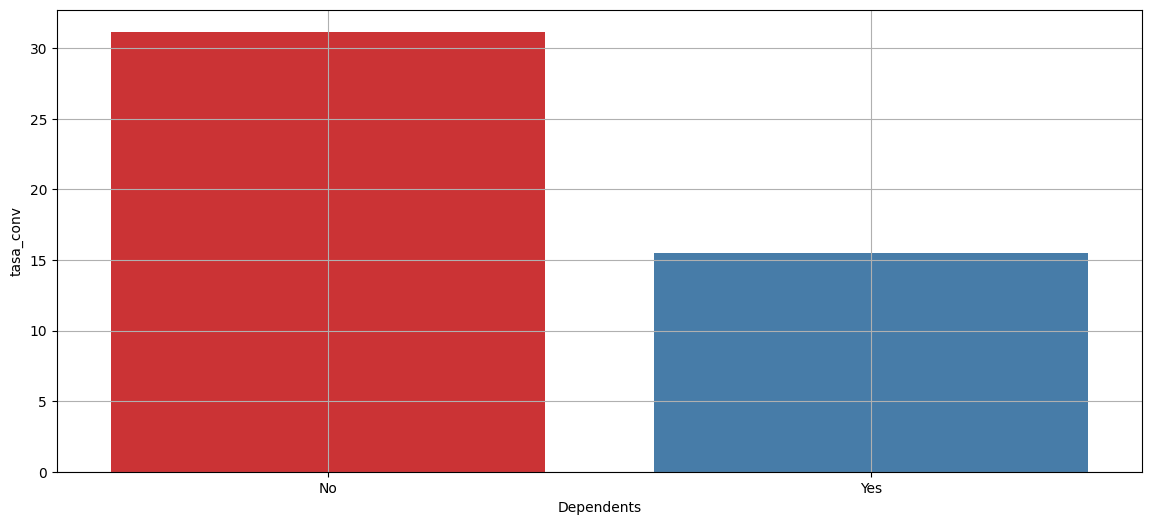

Los clientes que no tienen dependientes, tienen una mayor tasa de evasión que los que tienen dependientes, con una diferencia de alrededor del 16%

Analizando el tipo de servicio de internet que se ofrece, se arroja el siguiente gráfico:

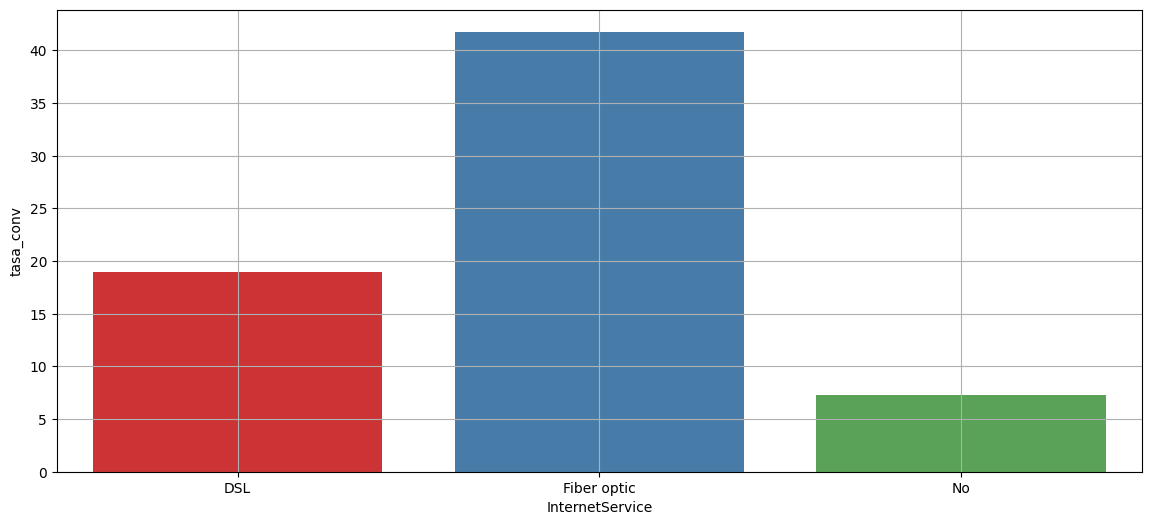

Donde los clientes que tienen fibra óptica presentan una tasa de cancelación mayor al 40%, por lo que este servicio es un factor  influyente.

Revisando los servicios adicionales de 'techsupport' y 'deviceprotection', obtenemos los siguientes gráficos:

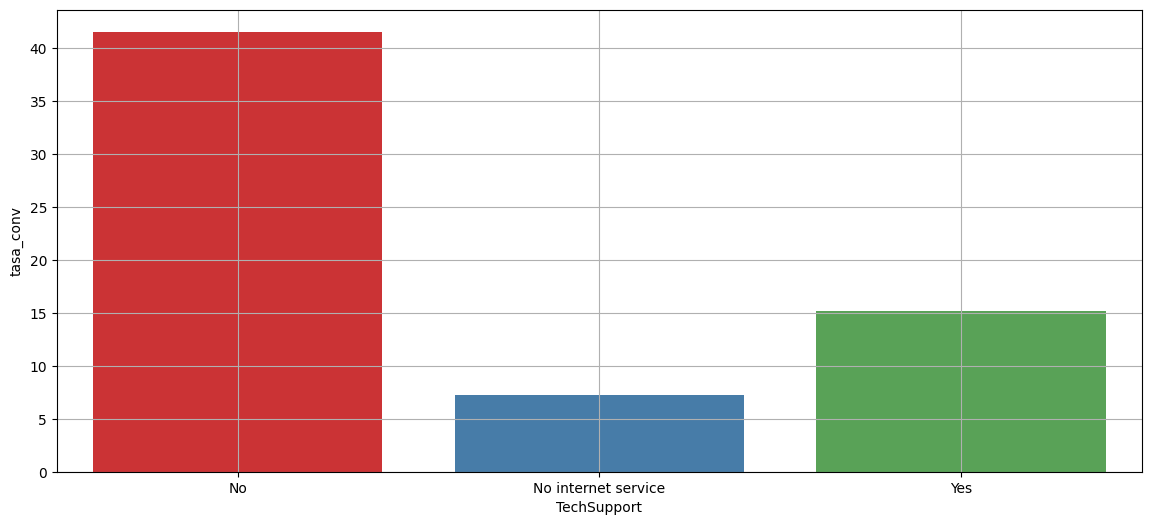

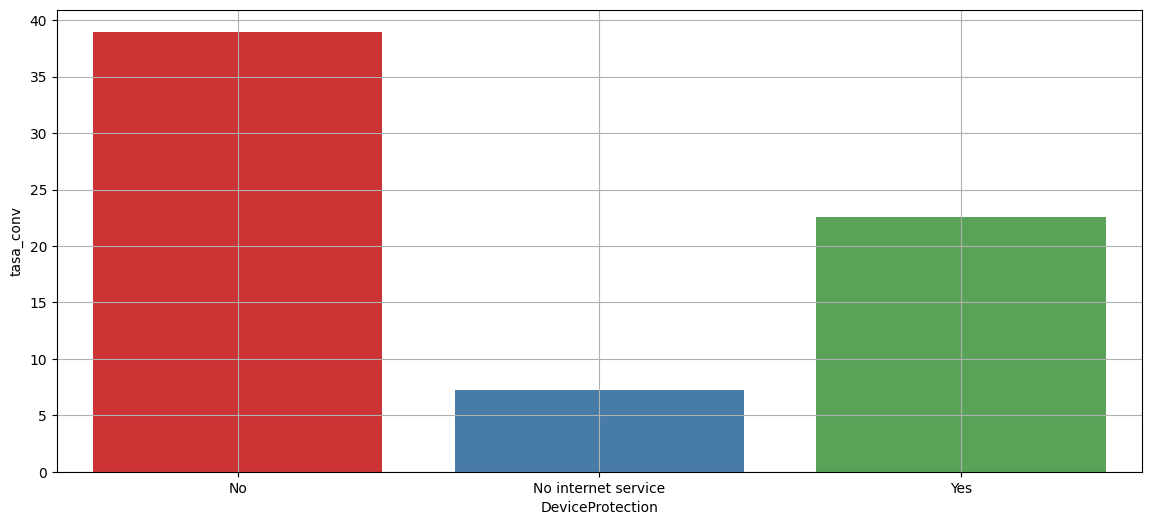

Los que no tienen servicios adicionales, son más propensos a cancelar el servicio, por lo que es otro factor que influye.

Si miramos el tipo de contrato que tiene cada cliente, se tiene el resultado a continuación:

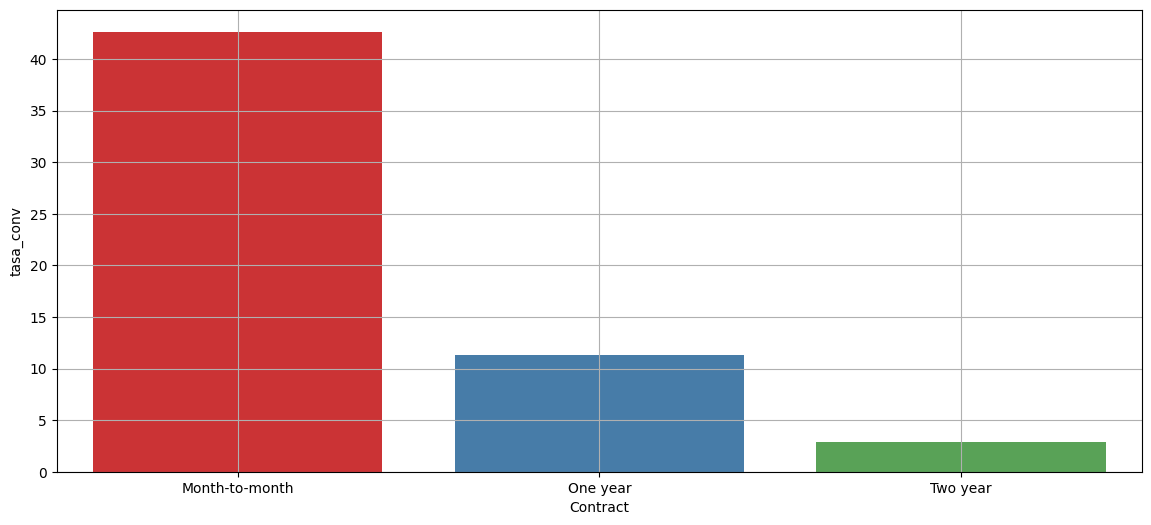

Podemos observar que los que tienen un contrato de mes a mes, tienen un alto porcentaje de evasión con m+as de 43%, siendo otro factor a tener en cuenta.

Por ultimo, se análiza el medio de pago, teniendo el siguiente:

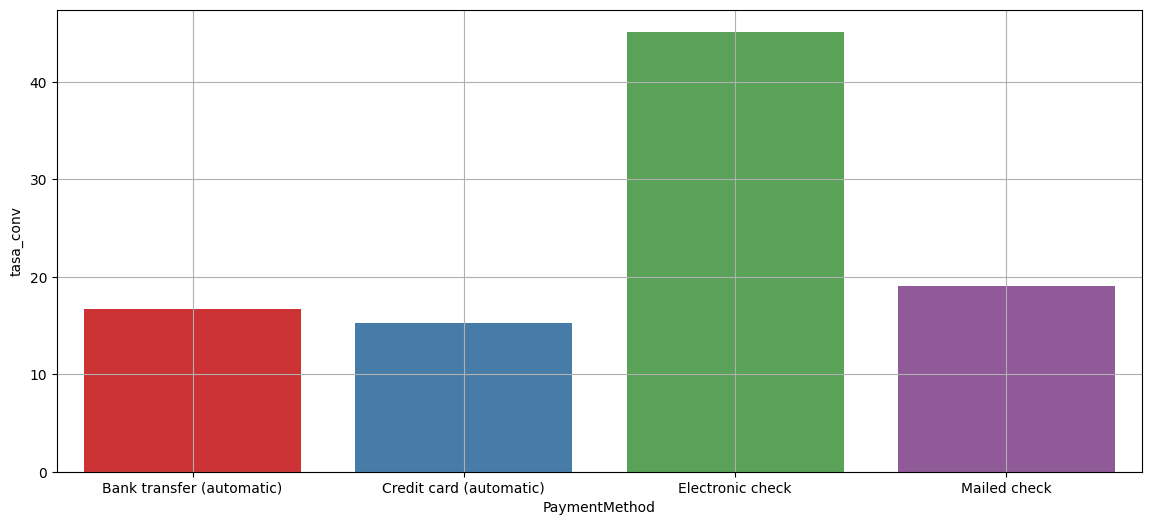

Donde los clientes de electronic check, poseen un alto porcentaje de evasión de más de 45% con una gran diferencia con el resto de metodos.

**Conclusión**

Teniendo todos estos datos análizados, los factores que más evasion presentan son 'ternure', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'TechSupport', 'Deviceprotection', 'Contract' y 'PaymentMethod', donde poseen alta diferencia en función a los subniveles que tienen y poseen una evasión mayor a 30%.

**Recomendaciones**

-Como los que poseen poca duración en sus contratos y los contratos que tienen contrato mes a mes tienen un alto porcentaje de evasión, se puede implementar una mejora a tal servicio, haciendolo más atractivo y de esta manera fidelizar al cliente.

-Teniendo en cuenta que el servicio de fibra optica, techsupport y device protection presentan una cantidad relevante de evasión, se pueden ofrecer planes que incluyan servicios adicionales a un precio considerable, con el fin de hacer atractivo estas propuestas.

-Por parte de los clientes que no tienen pareja y no tienen dependencias, estos son propensos a la evasión, se puede ofrecer descuentos para fidelizarlo.